In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

# Get the list of S&P 500 constituents
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [3]:
sp500.tail(1) #Adjusted Close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-18 00:00:00,137.880005,14.175,196.460007,153.839996,147.375,108.300003,74.82,341.720001,599.799988,196.850006,...,89.139999,62.459999,102.587799,34.060001,110.415001,130.5,118.93,269.079987,43.290001,195.985001


In [25]:
# Define the time period and lag, can be changed to any number and code will work
time_period = 1260  # 5 years
lag = 20 # lag of 20 days

# Calculate the rolling mean price
rolling_mean_price = sp500.rolling(window=time_period).mean().dropna(how='all')
lagged_closed_price = sp500[-lag -time_period: -lag] #shifts the df by 20 days
# Can also use .shift(20) to shift the df by 20 days instead of slicing
rolling_mean_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-19,47.103406,40.813849,30.271870,51.231858,NaN,42.048867,25.127976,103.327664,123.864508,59.430351,...,121.904877,32.271443,60.429088,50.499896,44.958305,57.210521,102.596520,94.356286,30.003460,52.043953
2018-12-20,47.123117,40.819131,30.288050,51.256880,NaN,42.073826,25.133288,103.383449,123.991183,59.458367,...,121.853224,32.290431,60.419881,50.491339,44.981795,57.239410,102.605990,94.435262,30.011801,52.083413
2018-12-21,47.141640,40.823627,30.303225,51.282511,NaN,42.098033,25.138267,103.431981,124.110762,59.486157,...,121.799300,32.309229,60.410417,50.482823,45.005347,57.269030,102.613822,94.510087,30.019430,52.122202
2018-12-24,47.159907,40.827139,30.317544,51.307685,NaN,42.121117,25.142476,103.477207,124.226556,59.512352,...,121.744156,32.326406,60.399736,50.474090,45.027416,57.297535,102.619966,94.581698,30.026689,52.159098
2018-12-26,47.180069,40.832770,30.333309,51.335930,NaN,42.146772,25.147677,103.525718,124.356302,59.540988,...,121.694607,32.344286,60.391067,50.466346,45.051567,57.327921,102.629173,94.659801,30.034974,52.198794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-12,112.216896,19.401746,119.945008,105.296344,NaN,98.360410,45.758889,250.715926,419.621350,138.930016,...,97.324141,60.788502,67.897036,45.530579,90.902111,107.994935,126.261177,319.802143,42.354695,153.963735
2023-12-13,112.268674,19.386296,120.070006,105.363401,NaN,98.393101,45.799476,250.871522,419.922080,139.018634,...,97.314192,60.801874,67.928421,45.529144,90.939918,108.033700,126.271670,319.861238,42.358671,154.051519
2023-12-14,112.323265,19.371047,120.195033,105.430649,NaN,98.426359,45.837167,251.026159,420.191199,139.113204,...,97.302737,60.815042,67.962322,45.527674,90.978957,108.072136,126.281967,319.939531,42.365521,154.140716


In [26]:

# Function to calculate momentum factors
def calculate_momentum_factors(tickers, time_period):

    # Calculate the 52-week trend
    slope_info = pd.DataFrame(index=sp500.columns)
    for i in range(1, lag + 1): 
        slope_info[i] = rolling_mean_price.apply(
            lambda x: np.polyfit(
                np.arange(len(x[-i - 252: -i])),
                                  x[-i - 252: -i], 1)[0] if x[-i - 252: -i].notna().all() else np.nan) 
    
    _52_week_trend = slope_info.mean(axis=1) 


    # Percent above 260 day Low
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Oscillator calculations
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # 39 week returns
    
    returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[-lag - time_period: -lag]
    vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change 
    vpt_51w = (vpt - vpt.shift(periods=51 * 5)).dropna(how='all').mean()
    # the shift is used to shift the df by 51 weeks so that we can calculate the difference between the current and prior 51 week period 
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = returns_39w
    new_table['51 Week Volume Price Trend'] = vpt_51w
    return new_table



In [27]:
momentum_factors = calculate_momentum_factors(tickers, time_period)
momentum_factors



,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.050436,38.316083,7.033382,0.135778,5.888175e+04
AAL,-0.022339,44.102476,-6.971433,-0.051336,9.198930e+07
AAPL,0.099791,60.517772,15.888574,0.315529,3.202919e+07
ABBV,0.054185,40.378221,10.688476,0.175842,-1.392343e+06
ABNB,NaN,32.584615,-6.145988,-0.048079,1.297341e+06
...,...,...,...,...,...
YUM,0.043444,36.494585,3.349908,0.080100,3.875875e+04
ZBH,0.014883,34.906580,0.571083,0.041145,-5.231855e+04
ZBRA,0.103139,57.846194,4.803177,0.149265,-1.075765e+05
ZION,-0.009033,52.649747,-0.752179,0.031972,-1.383253e+06


In [28]:
z_scores = (momentum_factors - momentum_factors.mean()) / momentum_factors.std()
z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
# The z-score is the number of standard deviations away from the mean a data point is.


In [29]:
z_scores.sort_values(ascending=False, inplace= True) #sorts the z-scores in descending order
long_basket= z_scores[:10] #selects the top 10 z-scores
short_basket = z_scores[-10:] #selects the bottom 10 z-scores

print("Long Basket:")
print (long_basket)
print("Short Basket:") 
print(short_basket)


Long Basket:
TSLA    41.696248
MRNA    20.055149
ENPH    18.732466
NVDA    16.175506
NVR     15.034496
AZO     10.564564
CMG     10.333465
BLDR     9.719564
AMD      9.462673
FCX      8.271157
dtype: float64
Short Basket:
BXP    -5.246981
MMM    -5.291374
INTC   -5.361874
PARA   -5.388450
WBA    -5.403414
WBD    -5.791499
BAX    -5.932274
FIS    -6.065053
VTRS   -6.486648
VFC    -7.494069
dtype: float64


In [30]:
#Back-Test period of time_period year (20 Day Lag)

# Get the lagged closing prices for the long and short baskets
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]


def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)



## Cumulative Returns

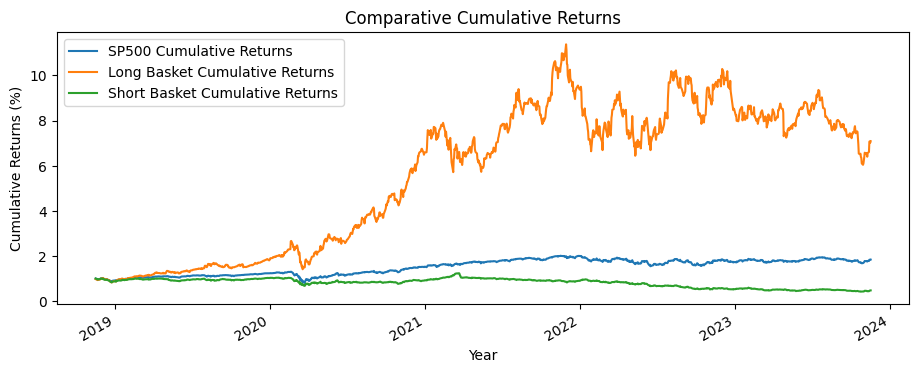

In [31]:
plt.figure(figsize=(11,4))
cumulative_returns.plot(label='SP500 Cumulative Returns')
long_cumulative_returns.plot(label='Long Basket Cumulative Returns')
short_cumulative_returns.plot(label='Short Basket Cumulative Returns')

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

In [32]:
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')

Date
2018-12-17   -0.068959
2018-12-18   -0.048544
2018-12-19   -0.050196
2018-12-20   -0.055952
2018-12-21   -0.090692
                ...   
2023-11-13   -0.036008
2023-11-14    0.014168
2023-11-15    0.039984
2023-11-16    0.066980
2023-11-17    0.103991
Length: 1240, dtype: float64

## Monthly Long basket return bar chart (pos/neg coloring) vs SP500

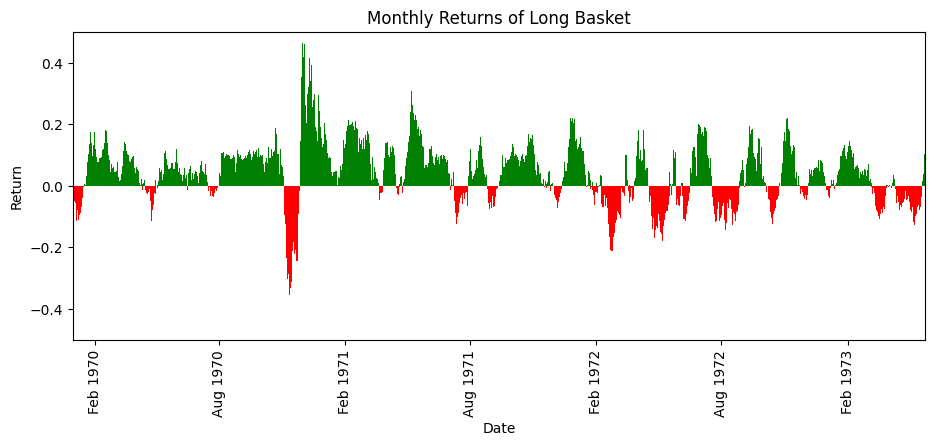

In [36]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return')
plt.title('Long Basket Monthly Returns')
plt.show()

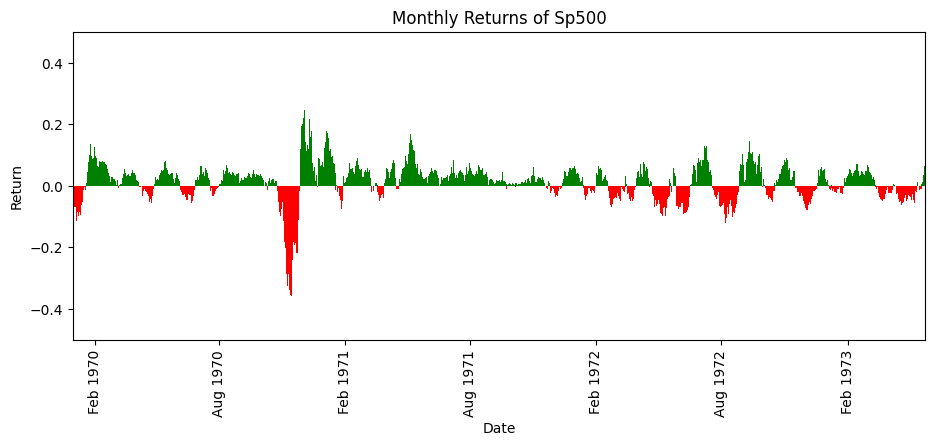

In [41]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Return')
plt.ylim(-0.5, 0.5)
plt.title('Sp500 Monthly Returns')
plt.show()

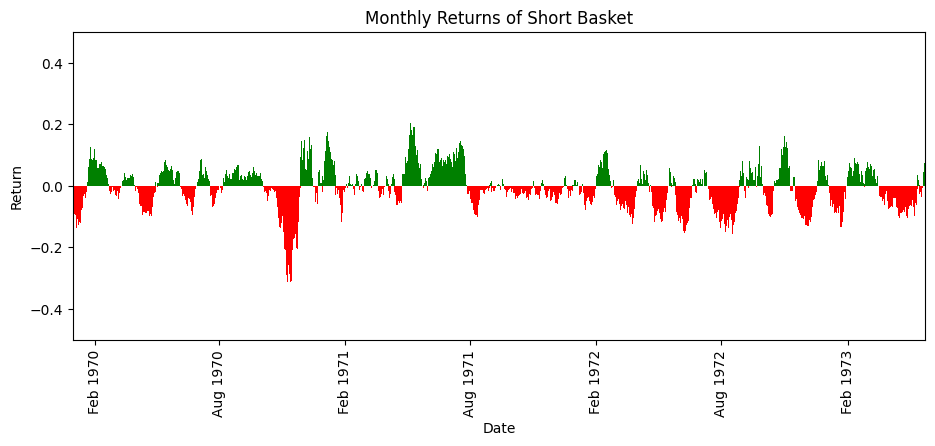

In [40]:
# Calculate 20-day returns, take the mean, drop NaNs, and plot
short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return')
plt.title('Short Basket Monthly Returns')
plt.show()

## Monthly return for long picks vs short picks vs SP500

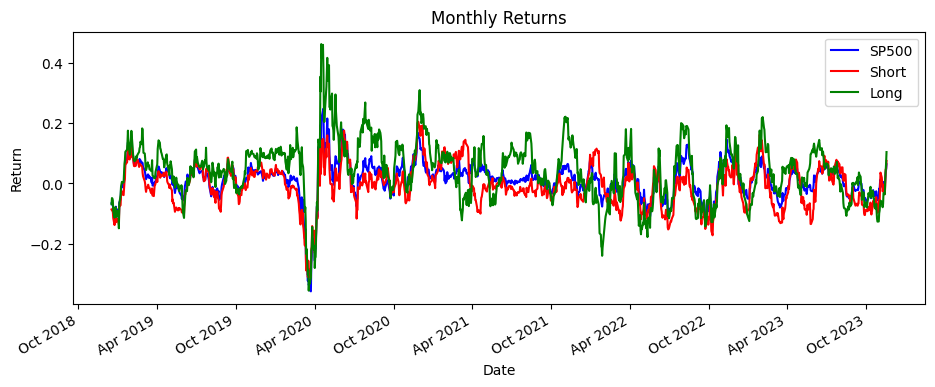

In [38]:
# monthly returns 
monthly_graph = pd.DataFrame()
lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500', color ='blue')
short_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short', color = 'red')
long_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long', color = 'green')
plt.legend()
plt.ylabel('Return')
# Set x-ticks to be months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Monthly Returns')
plt.show()


